# Analyse classes and class labels 
This is the next file to: 
1) get_relative_heights File (read in file and then determine the relative heights and save it)

Now: read in the file including the relative heights and analyse the classes

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Read file in and prepare to use 

In [3]:
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA"
FILE_NAME = r"/Cassette_relativeHeight.csv"
IMAGE_FILE_PATH = r"images"
df = pd.read_csv(FILE_PATH+FILE_NAME, delimiter=',')
df.head()

,Unnamed: 0,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401
1,2,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705
2,3,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850
3,4,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575
4,5,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727


In [4]:
# Get rid of first column (was ID-created by Python I assume)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0.0,303040192.0,5.17300,-2.334401
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0.0,303040192.0,5.15375,-2.335705
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0.0,303040192.0,5.13200,-2.335850
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0.0,303040192.0,5.11050,-2.335575
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0.0,303040192.0,5.08925,-2.335727


In [5]:
# Convert the two columns ID and CLASS into integer values
df = df.astype({"id": 'int64', "class": 'int64'})
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727


In [6]:
# Create a subsample to continue working with during the day so Dave can work on his computer 
subsample = df[:10000]

## Now analyse the classes

In [7]:
rows, columns = df.shape
n_classes = df["class"].value_counts().shape[0]
print "Number of points:", rows
print "Number of attributes:", columns
print "Number of different class labels in the column: class:", n_classes

Number of points: 12000000
Number of attributes: 12
Number of different class labels in the column: class: 22


In [8]:
# Returns the classes and how often each value occurs, in descending order for the frequency 
df["class"].value_counts()

203000000    7027016
202020000    3196982
202030000     907894
303040192     368271
304020000     202728
202040000      64303
202010000      60460
0              52508
303030304      38330
302020288      19912
302030400      18425
303020192      15051
304040000       9403
303020288       4065
303020608       3848
302020416       2478
301000000       2306
303030208       2001
302020608       1355
302020992       1200
303020000       1035
302020896        429
Name: class, dtype: int64

In [9]:
# Returns the classes and how often they occur, sorted by the class name 
df.groupby('class').size()

class
0              52508
202010000      60460
202020000    3196982
202030000     907894
202040000      64303
203000000    7027016
301000000       2306
302020288      19912
302020416       2478
302020608       1355
302020896        429
302020992       1200
302030400      18425
303020000       1035
303020192      15051
303020288       4065
303020608       3848
303030208       2001
303030304      38330
303040192     368271
304020000     202728
304040000       9403
dtype: int64

In [10]:
# Gives me the data types that occur 
df.dtypes

X                  float64
Y                  float64
Z                  float64
x_origin           float64
y_origin           float64
z_origin           float64
reflectance        float64
theta              float64
id                   int64
class                int64
range              float64
relative_height    float64
dtype: object

## Introduce categorial values so that it is easier to visualise 
For each class, give it the categorial name 

In [11]:
# This is just to visualise how many points there are for each class 
df['class'].value_counts().tolist()

[7027016,
 3196982,
 907894,
 368271,
 202728,
 64303,
 60460,
 52508,
 38330,
 19912,
 18425,
 15051,
 9403,
 4065,
 3848,
 2478,
 2306,
 2001,
 1355,
 1200,
 1035,
 429]

In [12]:
# Create a LookUpTable with all class codes that are in the class column (e.g. 0: unclassified)
lut_classCodes = df['class'].unique().tolist()
lut_classCodes.sort()
print type(lut_classCodes)
print lut_classCodes

<type 'list'>
[0, 202010000, 202020000, 202030000, 202040000, 203000000, 301000000, 302020288, 302020416, 302020608, 302020896, 302020992, 302030400, 303020000, 303020192, 303020288, 303020608, 303030208, 303030304, 303040192, 304020000, 304040000]


In [13]:
# Create a new column in the dataframe and now fill it with categorial data 
df["class_category"] = df["class"]

# This is the whole LUT to use later when I actually process the full data set 
lut_classnames = ["unclassified", "other_ground", "road", "sidewalk", "curb", "building", "other_object", 
                  "x1", "x2", "x3", "x4", "x5", "grid", "pedestrian", "x6", "x7", "x8", "x9", "x10", 
                  "x11", "tree", "potted_plant"]
lut_subset_10000 = ["road", "sidewalk", "curb", "building", "x"]  

# Modify that column to visualise it 
if len(lut_classCodes) == len(lut_classnames):
    for count, elem in enumerate(lut_classCodes):
        df["class_category"].where(df["class_category"] != elem, 
                                   lut_classnames[count], inplace=True)     
else:
    print("LUT must have same length")

In [14]:
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,class_category
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401,x11
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705,x11
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850,x11
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575,x11
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727,x11


In [15]:
df['class_category'].value_counts()

building        7027016
road            3196982
sidewalk         907894
x11              368271
tree             202728
curb              64303
other_ground      60460
unclassified      52508
x10               38330
x1                19912
grid              18425
x6                15051
potted_plant       9403
x7                 4065
x8                 3848
x2                 2478
other_object       2306
x9                 2001
x3                 1355
x5                 1200
pedestrian         1035
x4                  429
Name: class_category, dtype: int64

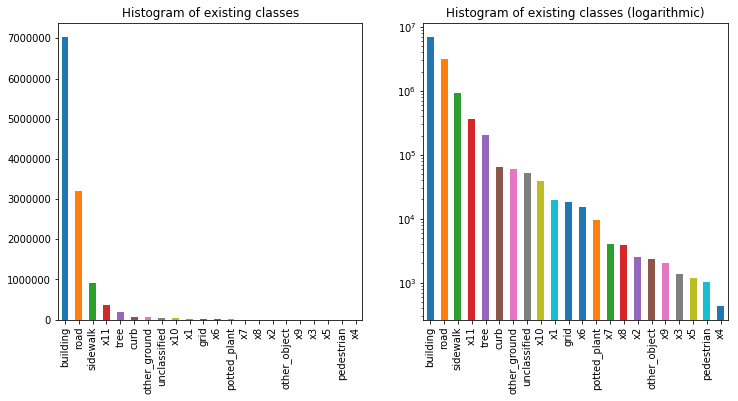

In [16]:
fig = plt.figure(figsize=(12,12))
plt.subplot(221), df['class_category'].value_counts().plot(kind='bar', logy=False, 
                                                           title="Histogram of existing classes")
plt.subplot(222), df['class_category'].value_counts().plot(kind='bar', logy=True, 
                                                           title="Histogram of existing classes (logarithmic)"), plt.show();
# Save the full figure...
fig.savefig(IMAGE_FILE_PATH+'/existing_classes_histo.png')

In [17]:
# Remove the class UNCLASSIFIED because it will bias my classifier 
df = df[df["class"] != 0.0]
df.head()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,class_category
0,1903.382935,21122.490234,38.991180,1907.911133,21121.59375,41.325581,-10.139493,-1.063594,0,303040192,5.17300,-2.334401,x11
1,1903.404541,21122.486328,38.990284,1907.911011,21121.59375,41.325989,-9.909495,-1.061419,0,303040192,5.15375,-2.335705,x11
2,1903.428223,21122.480469,38.990547,1907.910767,21121.59375,41.326397,-9.559498,-1.059231,0,303040192,5.13200,-2.335850,x11
3,1903.451538,21122.476562,38.991211,1907.910645,21121.59375,41.326786,-10.209500,-1.057138,0,303040192,5.11050,-2.335575,x11
4,1903.474854,21122.470703,38.991467,1907.910400,21121.59375,41.327194,-10.499502,-1.054956,0,303040192,5.08925,-2.335727,x11


## Re-label the classes 
Really, what I have to do now is to re-label the classes so that it is easier to visualise. I need to give the classes values from e.g. 1 - 22 so that I can address them easier 

In [18]:
df["class_category"].value_counts()

building        7027016
road            3196982
sidewalk         907894
x11              368271
tree             202728
curb              64303
other_ground      60460
x10               38330
x1                19912
grid              18425
x6                15051
potted_plant       9403
x7                 4065
x8                 3848
x2                 2478
other_object       2306
x9                 2001
x3                 1355
x5                 1200
pedestrian         1035
x4                  429
Name: class_category, dtype: int64

## Describe classes individually

Analyse the classes whether or not to discard them 

### Class 301000000 Other object
This could be anything and could ruin the classifier
Here, there are only 2,306 points present in this class 
It is remarkable that the points hardly vary in height
They are spread out over the X direction though 

I see they barely vary in Y and Z direction but in X direction
If X was the direction of trajectory, it could be sth along the facade and that could bias the classifier 

There are 7027016 building points so I assume these 2,306 will not harm the classification output 

In [19]:
df[df['class']== 301000000].describe()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.0,2306.0,2306.000000,2306.000000
mean,1923.269539,21232.690937,38.379800,1901.726675,21231.060714,40.060862,-13.903747,1.388678,206.0,301000000.0,21.711114,-1.681062
std,17.773365,2.875346,0.416667,0.079847,1.592388,0.019155,5.424067,0.092826,0.0,0.0,17.851659,0.414292
min,1906.927124,21229.917969,31.047712,1901.551514,21229.310547,40.036247,-20.679466,1.112306,206.0,301000000.0,5.363250,-8.990992
25%,1909.713837,21230.203125,38.137573,1901.659546,21229.695313,40.043043,-17.646759,1.326590,206.0,301000000.0,8.039875,-1.924552
50%,1916.396179,21231.490234,38.377304,1901.761475,21230.414063,40.057836,-14.928125,1.400859,206.0,301000000.0,14.760001,-1.681446
75%,1934.959229,21234.843750,38.593922,1901.795380,21232.332031,40.073724,-11.306511,1.471524,206.0,301000000.0,33.444502,-1.461348
max,2133.572754,21250.683594,39.244331,1901.810791,21234.648438,40.117241,31.650633,1.513419,206.0,301000000.0,232.791260,-0.815079


### Class 303020000: Pedestrian
There are 4/5 pedestrian classes present in my dataset and I cant identify which ones. However, they are very similar to each other: Stroling, walking, running, still 

Also, there is a lot of points classified as 303020000 which is the overall general class (not specified whether still, walking, strolling)

I will summarise them and assume it will not change too much 

In [20]:
# Create a new column in the dataframe
# This will be filles with new classes 
df["revised_class"] = df["class"] 

# Modify that column to get new class values 
# All pedestrians have now the same code: 303020000
df["revised_class"].where(np.trunc(df["revised_class"]/1000) != 303020.0, 
                                   303020000, inplace=True)

### Class 303030000 2-wheelers

There are only 2/13 2-wheelers classes represented in the dataset 
one of them (x9) has only 2001 points and therefore I will summarise them 

When I look at statistics, all the points for x9 are really close together and do not vary strongly in their location. Therefore, I assume that there is only one object represented in the dataset 

In [21]:
df[df['class_category']== "x9"].describe()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,revised_class
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.0,2001.0,2001.000000,2001.000000,2001.0
mean,1898.330926,21323.675819,38.313260,1895.472602,21323.476100,40.253746,-11.367581,0.993634,416.0,303030208.0,3.473105,-1.940486,303030208.0
std,0.286900,0.390786,0.299192,0.026797,0.377292,0.015808,4.534582,0.086008,0.0,0.0,0.321148,0.311471,0.0
min,1897.856323,21322.951172,37.793484,1895.426636,21322.779297,40.224747,-21.509680,0.789768,416.0,303030208.0,2.736500,-2.466552,303030208.0
25%,1898.112061,21323.322266,38.085117,1895.448975,21323.132813,40.240360,-14.949620,0.938210,416.0,303030208.0,3.224750,-2.173145,303030208.0
50%,1898.374390,21323.683594,38.310814,1895.473145,21323.488281,40.254211,-11.709639,0.986111,416.0,303030208.0,3.476000,-1.946655,303030208.0
75%,1898.503906,21324.013672,38.486694,1895.493286,21323.796875,40.264149,-7.519661,1.062660,416.0,303030208.0,3.648750,-1.755897,303030208.0
max,1900.103882,21324.333984,39.017738,1895.531250,21324.105469,40.289982,14.800331,1.154917,416.0,303030208.0,5.165500,-1.212532,303030208.0


In [22]:
# Modify that column to get new class values 
# All 2-wheelers have now the same code
df["revised_class"].where(np.trunc(df["revised_class"]/1000) != 303030.0, 
                                   303030000, inplace=True)

### Class 303040192: 4-wheelers

There is only one class but with a wron glabel, therefore I just rename it 

In [23]:
# Modify that column to get new class values 
# All cars have now the same code
df["revised_class"].where(np.trunc(df["revised_class"]/1000) != 303040.0, 
                                   303040000, inplace=True)

### Problem with surface:ground:other_ground

There are absolutely no differences to any other ground class, not sure what it represents, but it has same amount of points as curb (vetical side of the sidewalk)

Really, it could represent anything 

In [29]:
df[df['class_category']== "other_ground"].describe()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,revised_class
count,60460.000000,60460.000000,60460.000000,60460.000000,60460.000000,60460.000000,60460.000000,60460.000000,60460.000000,60460.0,60460.000000,60460.000000,60460.0
mean,1903.165806,21163.417454,38.495196,1906.264814,21163.618743,40.839242,-10.429969,-0.832085,82.607658,202010000.0,3.990601,-2.344046,202010000.0
std,5.041617,51.806536,0.348511,3.339961,51.893847,0.320382,2.077102,0.161936,101.204474,0.0,1.882238,0.112642,0.0
min,1877.072266,21127.154297,37.878448,1895.810059,21127.271484,40.154217,-21.469677,-1.462047,28.000000,202010000.0,2.987500,-2.517414,202010000.0
25%,1902.272705,21131.750000,38.029692,1904.453857,21131.937500,40.465013,-11.719652,-0.886470,28.000000,202010000.0,3.256250,-2.393209,202010000.0
50%,1905.018799,21139.682617,38.651297,1907.770569,21139.861328,40.991585,-10.689684,-0.778724,41.000000,202010000.0,3.420500,-2.333235,202010000.0
75%,1905.582520,21193.199219,38.780683,1908.271362,21193.349609,41.084287,-9.539686,-0.723771,130.000000,202010000.0,3.870750,-2.301556,202010000.0
max,1906.425781,21323.765625,39.627590,1908.501587,21324.113281,41.193508,0.380335,-0.658289,411.000000,202010000.0,18.915751,-0.539700,202010000.0


In [27]:
df[df['class_category']== "sidewalk"].describe()

,X,Y,Z,x_origin,y_origin,z_origin,reflectance,theta,id,class,range,relative_height,revised_class
count,907894.000000,907894.000000,907894.000000,907894.000000,907894.000000,907894.000000,907894.000000,907894.000000,907894.000000,907894.0,907894.000000,907894.000000,907894.0
mean,1904.012003,21202.644186,38.234118,1903.636875,21202.603276,40.543196,-10.197378,0.146411,83.346955,202030000.0,4.033867,-2.309078,202030000.0
std,5.333242,50.642008,0.283496,3.280391,50.668356,0.282885,1.583301,0.899154,111.061901,0.0,1.741243,0.083905,0.0
min,1854.428467,21118.503906,37.475258,1895.188232,21121.685547,40.041687,-21.359766,-1.518246,4.000000,202030000.0,2.365750,-2.941643,202030000.0
25%,1901.284821,21160.173828,38.023102,1901.480499,21160.111328,40.312668,-10.919641,-0.830386,14.000000,202030000.0,3.258000,-2.363156,202030000.0
50%,1904.299316,21195.974609,38.176607,1904.078857,21195.861328,40.471378,-10.249683,0.716594,57.000000,202030000.0,3.566250,-2.314148,202030000.0
75%,1907.835449,21239.244141,38.437469,1906.395630,21239.183594,40.773162,-9.529688,0.889709,57.000000,202030000.0,4.163750,-2.258762,202030000.0
max,1957.697876,21328.513672,40.366112,1908.519775,21328.144531,41.269775,12.690713,1.604326,433.000000,202030000.0,50.004753,-0.758625,202030000.0
